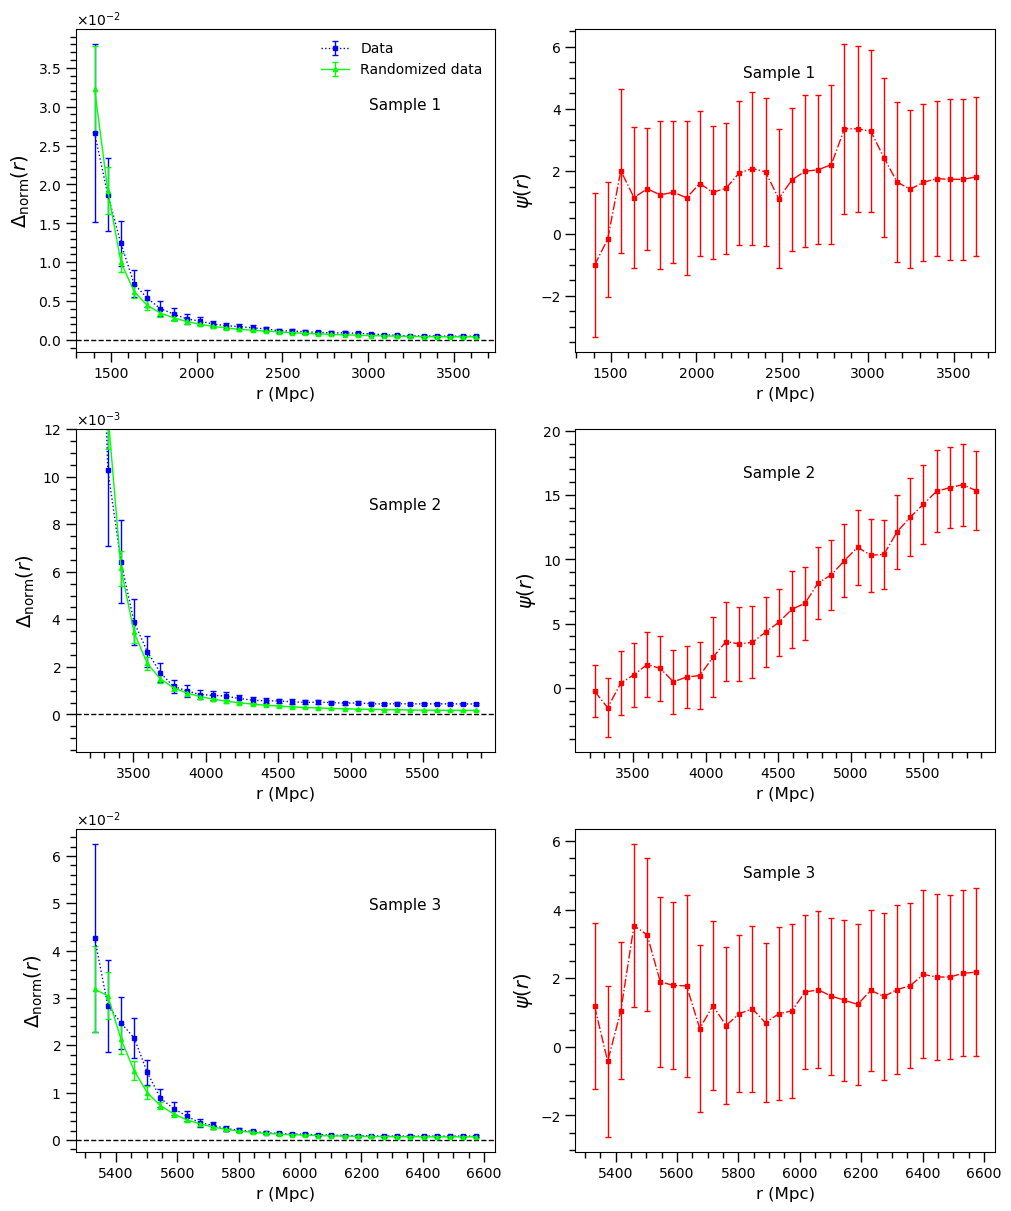

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import os
output_dir = "../../../../results/supplementary_plots"
os.makedirs(output_dir, exist_ok=True)

# Disable LaTeX rendering (use default mathtext instead)
plt.rcParams['text.usetex'] = False   #<-- Removed

fig, axes = plt.subplots(3, 2, figsize=(10, 12), constrained_layout=True)

for i in range(3):  
    f_name1 = f'inter_data1/sample_{i+1}_criteria_err.csv'
    df1 = pd.read_csv(f_name1)
    R = df1['r'].to_numpy()
    cri = df1['crit'].to_numpy()
    d_cri = df1['sd'].to_numpy()
    
    f_name2 = f'inter_data2/sample_rand_{i+1}_criteria.csv'
    df2 = pd.read_csv(f_name2)
    R_rand = df2['r'].to_numpy()
    cri_rand = df2['crit'].to_numpy()
    d_cri_rand = df2['sd'].to_numpy()

    new_cri = (cri - cri_rand) / d_cri_rand
    d_new_cri = np.sqrt(d_cri**2 + d_cri_rand**2) / d_cri_rand

    # ==== Left Panel: Entropy dispersion ====
    ax = axes[i, 0]
    ax.set_xlabel("r (Mpc)", fontsize=12)
    ax.set_ylabel(r"$\Delta_{\mathrm{norm}}(r)$", fontsize=14)

    ax.errorbar(R, cri, yerr=d_cri, ls=':', lw=1, marker='s', markersize=3, c='b',
                ecolor='b', elinewidth=1, capsize=2, label='Data')
    ax.errorbar(R, cri_rand, yerr=d_cri_rand, ls='-', lw=1, marker='^', markersize=3,
                c='lime', ecolor='lime', elinewidth=1, capsize=2, label='Randomized data')

    if i == 0:
        ax.legend(fontsize=10, frameon=False)

    formatter = ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 1))
    ax.yaxis.set_major_formatter(formatter)

    if(i==1):
        ax.set_ylim(top=0.012)
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3))

    
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=1, labelsize=10)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4, color='k')
    ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
    ax.text(0.7, 0.75, f"Sample {i+1}", transform=ax.transAxes, fontsize=11)

    # ==== Right Panel: Stability criteria ====
    ax = axes[i, 1]
    ax.set_xlabel("r (Mpc)", fontsize=12)
    ax.set_ylabel(r"$\psi(r)$", fontsize=14)

    ax.errorbar(R, new_cri, yerr=d_new_cri, ls='-.', lw=1, marker='s', markersize=3,
                c='r', ecolor='r', elinewidth=1, capsize=2)




    
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=1, labelsize=10)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4, color='k')
    ax.text(0.4, 0.85, f"Sample {i+1}", transform=ax.transAxes, fontsize=11)

# Save and show the complete figure
# plt.savefig("plot_err_10.pdf", bbox_inches='tight')
plt.savefig("../../../../results/supplementary_plots/suppl_fig10.pdf", bbox_inches='tight')

plt.show()



In [ ]:
import shutil
shutil.rmtree('inter_data1')
shutil.rmtree('inter_data2')
     